## 실루엣 분석

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

- 아이리스 데이터 클러스터링 평가

In [20]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA - 차원 축소는 필요없음
from sklearn.cluster import KMeans
iris = load_iris()

In [21]:
iris_std = StandardScaler().fit_transform(iris.data)
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [22]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(3)

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


- 실루엣 계수(Silhoutte)

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(iris_std, df.cluster)
df['실루엣 계수'] = sil_samples
df.head(3)

,sl,sw,pl,pw,target,cluster,실루엣 계수
0,5.1,3.5,1.4,0.2,0,1,0.734195
1,4.9,3.0,1.4,0.2,0,1,0.568274
2,4.7,3.2,1.3,0.2,0,1,0.677547


- 실루엣 스코어 : 실루엣 계수의 평균이 실루엣 스코어

In [24]:
silhouette_score(iris_std, kmeans.labels_)

0.45994823920518635

In [25]:
df['실루엣 계수'].mean()

0.45994823920518635

In [26]:
# 클러스터 별 실루엣 스코어
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.347392
1,0.636316
2,0.393377


* 실루엣 계수의 시각화

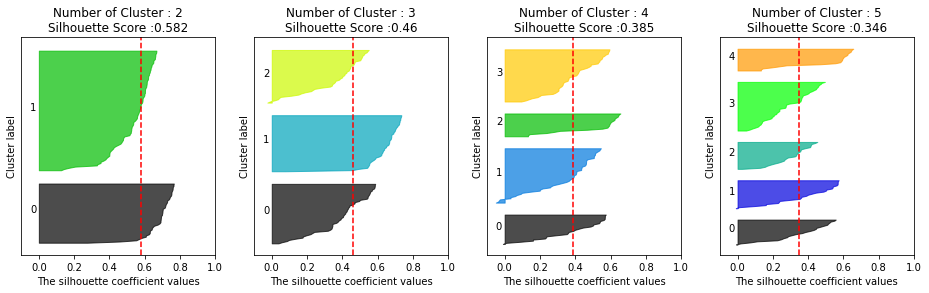

In [18]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], iris_std)